#### This notebook is to perform Multiple Linear Regression 

In [1]:
options(warns=-1)

In [2]:
data = read.csv('../data/mros_mapping_alpha.txt', stringsAsFactors=FALSE, sep='\t')
data$Age_78 = data$Age - min(data$Age)

In [3]:
head(data)

X.SampleID,BarcodeSequence,LinkerPrimerSequence,Experiment_Design_Description,Library_Construction_Protocol,Linker,Platform,Center_Name,Center_Project,Instrument_Model,...,QLCOMP,M1STATIN,Antihistamine,Laxative,MIDATA,Rstarch_total,Rstarches_c,M1PPUMP,alpha_pd,Age_78
BI0023,TCTGGTGACATT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,...,1:GOOD/EXCELLENT,0: No,0:No,0:No,1: Yes,3.066569,0,0: No,30.02140,5
BI0056,CAAGCATGCCTA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,...,1:GOOD/EXCELLENT,0: No,0:No,0:No,1: Yes,3.038136,0,1: Yes,18.41498,3
BI0131,CTATTTGCGACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,...,1:GOOD/EXCELLENT,1: Yes,0:No,0:No,1: Yes,2.840599,0,0: No,25.75695,5
BI0153,ATCGGCGTTACA,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,...,1:GOOD/EXCELLENT,1: Yes,0:No,0:No,1: Yes,4.106798,0,0: No,20.16791,1
BI0215,CCTCTCGTGATC,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,...,1:GOOD/EXCELLENT,0: No,0:No,0:No,1: Yes,0.971114,0,0: No,20.71433,3
BI0353,TGCCATCTGAAT,GGACTACHVGGGTWTCTAAT,16S stool samples sequenced for MrOS Vitamin D study,16S rRNA v4,GT,Illumina,BI,MrOS,Illumina MiSeq,...,1:GOOD/EXCELLENT,1: Yes,0:No,0:No,1: Yes,4.813568,0,0: No,14.17015,2


In [4]:
# standardize Vitamin D measurements
data$OHV1D3 = (data$OHV1D3 - mean(data$OHV1D3, na.rm=TRUE)) / sd(data$OHV1D3, na.rm=TRUE)
data$OHVD3 = (data$OHVD3 - mean(data$OHVD3, na.rm=TRUE)) / sd(data$OHVD3, na.rm=TRUE)
data$OHV24D3 = (data$OHV24D3 - mean(data$OHV24D3, na.rm=TRUE)) / sd(data$OHV24D3, na.rm=TRUE)
data$ratio_activation = (data$ratio_activation- mean(data$ratio_activation, na.rm=TRUE)) / sd(data$ratio_activation, na.rm=TRUE)
data$ratio_catabolism = (data$ratio_catabolism- mean(data$ratio_catabolism, na.rm=TRUE)) / sd(data$ratio_catabolism, na.rm=TRUE)

In [5]:
# convert character to factors
data$GIERACE = factor(data$GIERACE)
data$SITE = factor(data$SITE)
data$M1ANTIB = factor(data$M1ANTIB)
data$M1ADEPR = factor(data$M1ADEPR)
data$TUDRAMT = factor(data$TUDRAMT)
data$TURSMOKE = factor(data$TURSMOKE)
data$M1VITMND = factor(data$M1VITMND)
data$M1PROBI = factor(data$M1PROBI)
data$OHSEAS = factor(data$OHSEAS)
data$VDstatus = factor(data$VDstatus)
data$QLCOMP = factor(data$QLCOMP)
data$M1STATIN = factor(data$M1STATIN)
data$Antihistamine = factor(data$Antihistamine)
data$Laxative = factor(data$Laxative)
data$M1PPUMP = factor(data$M1PPUMP)

# combine missing values in VDstatus into one group
data$VDstatus[data$VDstatus==''] <- 'Missing:Not collected '

# change levels
data$SITE = relevel(data$SITE, ref='San Diego')
data$TUDRAMT = relevel(data$TUDRAMT, ref='0:None drinker')
data$M1VITMND = relevel(data$M1VITMND, ref='1: Yes')
data$OHSEAS = relevel(data$OHSEAS, ref='3:SUMMER')
data$VDstatus = relevel(data$VDstatus, ref='sufficiency')
data$QLCOMP = relevel(data$QLCOMP, ref='1:GOOD/EXCELLENT')
data$M1PPUMP = relevel(data$M1PPUMP, ref='0: No')

In [6]:
colnames(data)

[1] "X.SampleID"                    "BarcodeSequence"              
 [3] "LinkerPrimerSequence"          "Experiment_Design_Description"
 [5] "Library_Construction_Protocol" "Linker"                       
 [7] "Platform"                      "Center_Name"                  
 [9] "Center_Project"                "Instrument_Model"             
[11] "Title"                         "Anonymized_Name"              
[13] "Scientific_Name"               "Taxon_ID"                     
[15] "Sample_Type"                   "Geo_Loc_Name"                 
[17] "Elevation"                     "Env_Biome"                    
[19] "Env_Feature"                   "Env_Material"                 
[21] "Env_Package"                   "Latitude"                     
[23] "Longitude"                     "Collection_Timestamp"         
[25] "DNA_Extracted"                 "Physical_Specimen_Location"   
[27] "Physical_Specimen_Remaining"   "Age"                          
[29] "Age_Units"                     "Host_Subject_ID"              
[31] "Host_Taxid"                    "Host_Scientific_Name"         
[33] "Host_Common_Name"              "Life_Stage"                   
[35] "Sex"                           "Height"                       
[37] "Height_Units"                  "Weight"                       
[39] "Weight_Units"                  "BMI"                          
[41] "Body_Habitat"                  "Body_Site"                    
[43] "Body_Product"                  "GIERACE"                      
[45] "SITE"                          "TUDRAMT"                      
[47] "PASCORE"                       "TURSMOKE"                     
[49] "DTVITD"                        "M1ADEPR"                      
[51] "M1VITMND"                      "M1ANTIB"                      
[53] "M1PROBI"                       "OHV1D3"                       
[55] "OHV24D3"                       "OHVD3"                        
[57] "OHVD2"                         "OHV1D2"                       
[59] "OHV1D2CT"                      "OHVD2CT"                      
[61] "OHVDTOT"                       "OHV1DTOT"                     
[63] "OHSEAS"                        "VDstatus"                     
[65] "Description"                   "ratio_activation"             
[67] "ratio_catabolism"              "QLCOMP"                       
[69] "M1STATIN"                      "Antihistamine"                
[71] "Laxative"                      "MIDATA"                       
[73] "Rstarch_total"                 "Rstarches_c"                  
[75] "M1PPUMP"                       "alpha_pd"                     
[77] "Age_78"

In [7]:
summary(data)

  X.SampleID        BarcodeSequence    LinkerPrimerSequence
 Length:598         Length:598         Length:598          
 Class :character   Class :character   Class :character    
 Mode  :character   Mode  :character   Mode  :character    
                                                           
                                                           
                                                           
                                                           
 Experiment_Design_Description Library_Construction_Protocol    Linker         
 Length:598                    Length:598                    Length:598        
 Class :character              Class :character              Class :character  
 Mode  :character              Mode  :character              Mode  :character  
                                                                               
                                                                               
                                        

In [8]:
attach(data)

## stepwise backwards selection, with p-value threshold 0.2

In [9]:
library(car)
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      DTVITD + M1ADEPR + M1VITMND + M1ANTIB + M1PROBI + OHSEAS + 
      QLCOMP + M1STATIN + Antihistamine + Laxative + Rstarch_total + M1PPUMP))

Loading required package: carData


,Sum Sq,Df,F value,Pr(>F)
Age_78,1.310074e+02,1,3.167822e+00,0.075658615
BMI,1.100552e+02,1,2.661188e+00,0.103400541
GIERACE,6.843251e+02,4,4.136828e+00,0.002605382
SITE,5.322389e+02,5,2.573959e+00,0.025783014
TUDRAMT,3.077385e+02,6,1.240211e+00,0.283911119
PASCORE,2.672495e+02,1,6.462223e+00,0.011294355
TURSMOKE,4.363945e+01,3,3.517410e-01,0.787905962
DTVITD,1.168403e-03,1,2.825254e-05,0.995760956
M1ADEPR,2.538791e+02,1,6.138920e+00,0.013525205
M1VITMND,6.687324e+00,1,1.617027e-01,0.687751027


In [10]:
# drop DTVITD
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      M1ADEPR + M1VITMND + M1ANTIB + M1PROBI + OHSEAS + 
      QLCOMP + M1STATIN + Antihistamine + Laxative + Rstarch_total + M1PPUMP))

,Sum Sq,Df,F value,Pr(>F)
Age_78,132.162742,1,3.20161188,0.074118867
BMI,110.597870,1,2.67920783,0.102241448
GIERACE,686.952427,4,4.16031595,0.002501028
SITE,537.173284,5,2.60257973,0.024376173
TUDRAMT,309.730203,6,1.25052376,0.278781407
PASCORE,267.405651,1,6.47784010,0.011196213
TURSMOKE,43.797754,3,0.35366349,0.786512907
M1ADEPR,253.887547,1,6.15036715,0.013438380
M1VITMND,6.733667,1,0.16312152,0.686456569
M1ANTIB,419.108280,1,10.15280121,0.001523023


In [11]:
# drop M1PPUMP
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      M1ADEPR + M1VITMND + M1ANTIB + M1PROBI + OHSEAS + 
      QLCOMP + M1STATIN + Antihistamine + Laxative + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,132.210330,1,3.20856782,0.073805298
BMI,110.314986,1,2.67719710,0.102368908
GIERACE,686.654873,4,4.16604877,0.002475865
SITE,537.114934,5,2.60701216,0.024163285
TUDRAMT,310.820919,6,1.25720131,0.275497617
PASCORE,267.607108,1,6.49446647,0.011092725
TURSMOKE,43.440014,3,0.35141034,0.788145505
M1ADEPR,254.373656,1,6.17330830,0.013266637
M1VITMND,6.748749,1,0.16378311,0.685855033
M1ANTIB,418.967372,1,10.16777757,0.001510776


In [12]:
# drop Antihistamine
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + TURSMOKE + 
      M1ADEPR + M1VITMND + M1ANTIB + M1PROBI + OHSEAS + 
      QLCOMP + M1STATIN + Laxative + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,133.616010,1,3.2483950,0.072041788
BMI,112.545888,1,2.7361504,0.098672429
GIERACE,687.112717,4,4.1761715,0.002432364
SITE,535.699156,5,2.6047215,0.024269983
TUDRAMT,310.468968,6,1.2579903,0.275108483
PASCORE,266.708665,1,6.4840665,0.011156531
TURSMOKE,43.443575,3,0.3520583,0.787675913
M1ADEPR,256.770541,1,6.2424565,0.012763576
M1VITMND,6.621728,1,0.1609836,0.688408661
M1ANTIB,424.013851,1,10.3083790,0.001401734


In [13]:
# drop TURSMOKE
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1VITMND + M1ANTIB + M1PROBI + OHSEAS + 
      QLCOMP + M1STATIN + Laxative + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,137.508062,1,3.3548301,0.067546849
BMI,116.814241,1,2.8499560,0.091941263
GIERACE,678.127658,4,4.1361267,0.002605876
SITE,532.517709,5,2.5984024,0.024566267
TUDRAMT,300.465641,6,1.2217601,0.293245236
PASCORE,258.916952,1,6.3168833,0.012243023
M1ADEPR,263.429282,1,6.4269721,0.011514937
M1VITMND,7.618081,1,0.1858609,0.666552446
M1ANTIB,434.480061,1,10.6001550,0.001200113
M1PROBI,4.981828,1,0.1215433,0.727499555


In [14]:
# drop M1PROBI
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1VITMND + M1ANTIB + OHSEAS + 
      QLCOMP + M1STATIN + Laxative + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,143.460096,1,3.5056126,0.061688720
BMI,119.360158,1,2.9167029,0.088228063
GIERACE,674.636015,4,4.1213769,0.002672890
SITE,535.359798,5,2.6164266,0.023711275
TUDRAMT,308.997629,6,1.2584521,0.274868724
PASCORE,264.828555,1,6.4713906,0.011233441
M1ADEPR,261.266599,1,6.3843501,0.011790876
M1VITMND,6.951967,1,0.1698793,0.680378798
M1ANTIB,446.744989,1,10.9167281,0.001014662
OHSEAS,306.434427,4,1.8720195,0.113877986


In [15]:
# drop M1VITMND
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1ANTIB + OHSEAS + 
      QLCOMP + M1STATIN + Laxative + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,141.229612,1,3.4562871,0.063541651
BMI,121.880975,1,2.9827714,0.084712453
GIERACE,673.750131,4,4.1221417,0.002668905
SITE,537.564155,5,2.6311423,0.023034157
TUDRAMT,309.063016,6,1.2606073,0.273814807
PASCORE,260.520615,1,6.3756745,0.011847472
M1ADEPR,260.526129,1,6.3758095,0.011846582
M1ANTIB,442.330380,1,10.8250725,0.001064996
OHSEAS,315.692723,4,1.9314729,0.103767828
QLCOMP,8.595649,1,0.2103598,0.646665425


In [16]:
# drop QLCOMP
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1ANTIB + OHSEAS + 
      M1STATIN + Laxative + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,136.29073,1,3.340171,0.068144334
BMI,121.18133,1,2.969875,0.085385393
GIERACE,673.50796,4,4.126531,0.002648240
SITE,531.10502,5,2.603231,0.024328853
TUDRAMT,307.07810,6,1.254296,0.276896321
PASCORE,252.17901,1,6.180325,0.013210966
M1ADEPR,261.05795,1,6.397927,0.011701080
M1ANTIB,437.17744,1,10.714209,0.001129311
OHSEAS,312.43576,4,1.914270,0.106599699
M1STATIN,50.96182,1,1.248957,0.264235403


In [17]:
# drop Laxative
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + TUDRAMT + PASCORE + 
      M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,133.01366,1,3.263910,0.071360582
BMI,122.41882,1,3.003932,0.083617114
GIERACE,669.25080,4,4.105545,0.002745854
SITE,530.42994,5,2.603155,0.024330520
TUDRAMT,301.45961,6,1.232877,0.287566511
PASCORE,265.25309,1,6.508822,0.011000676
M1ADEPR,265.43040,1,6.513173,0.010974111
M1ANTIB,436.46803,1,10.710121,0.001131639
OHSEAS,318.33269,4,1.952824,0.100341897
M1STATIN,51.94376,1,1.274604,0.259391590


In [18]:
# drop TURDAMT
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + PASCORE + 
      M1ADEPR + M1ANTIB + OHSEAS + M1STATIN + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,130.82681,1,3.202287,0.0740736921
BMI,123.76933,1,3.029539,0.0823085505
GIERACE,832.74525,4,5.095839,0.0004864251
SITE,641.25000,5,3.139214,0.0083497305
PASCORE,294.49269,1,7.208386,0.0074705851
M1ADEPR,294.44141,1,7.207131,0.0074757442
M1ANTIB,428.88604,1,10.497973,0.0012656984
OHSEAS,293.70761,4,1.797292,0.1278573346
M1STATIN,59.88723,1,1.465878,0.2265061400
Rstarch_total,89.25753,1,2.184784,0.1399408617


In [19]:
# drop M1STATIN
Anova(lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + PASCORE + 
      M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total))

,Sum Sq,Df,F value,Pr(>F)
Age_78,136.45143,1,3.337201,0.0682590276
BMI,137.25177,1,3.356775,0.0674570815
GIERACE,857.59147,4,5.243542,0.0003750032
SITE,651.94862,5,3.188950,0.0075483941
PASCORE,310.80527,1,7.601384,0.0060215875
M1ADEPR,302.80001,1,7.405599,0.0067033222
M1ANTIB,425.59368,1,10.408772,0.0013270039
OHSEAS,289.85774,4,1.772267,0.1328911030
Rstarch_total,84.22075,1,2.059792,0.1517860917
Residuals,23019.93459,563,NA,NA


In [20]:
#### model with confounders ######
mdl_cf = lm(alpha_pd ~ Age_78 + BMI + GIERACE + SITE + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)

# Multiple Linear Regression

## Activation

In [21]:
fit_act = lm(alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + SITE + PASCORE + 
             M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)
summary(fit_act)


Call:
lm(formula = alpha_pd ~ ratio_activation + Age_78 + BMI + GIERACE + 
    SITE + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9381  -4.5983  -0.4128   4.1691  19.4917 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               25.795745   2.389256  10.797  < 2e-16 ***
ratio_activation           1.116985   0.296390   3.769 0.000183 ***
Age_78                     0.159134   0.070594   2.254 0.024595 *  
BMI                       -0.125441   0.074354  -1.687 0.092183 .  
GIERACE2:AFRICAN AMERICAN -2.442462   1.588013  -1.538 0.124637    
GIERACE3:ASIAN            -6.445504   1.446292  -4.457 1.02e-05 ***
GIERACE4:HISPANIC         -0.793305   1.929151  -0.411 0.681080    
GIERACE5:OTHER            -2.667098   2.159570  -1.235 0.217379    
SITEBirmingham            -0.841005   1.004190  -0.837 0.402696    
SITEMinneapolis            1.102667   0.928691   1.187 0.235

73 425 
 62 382

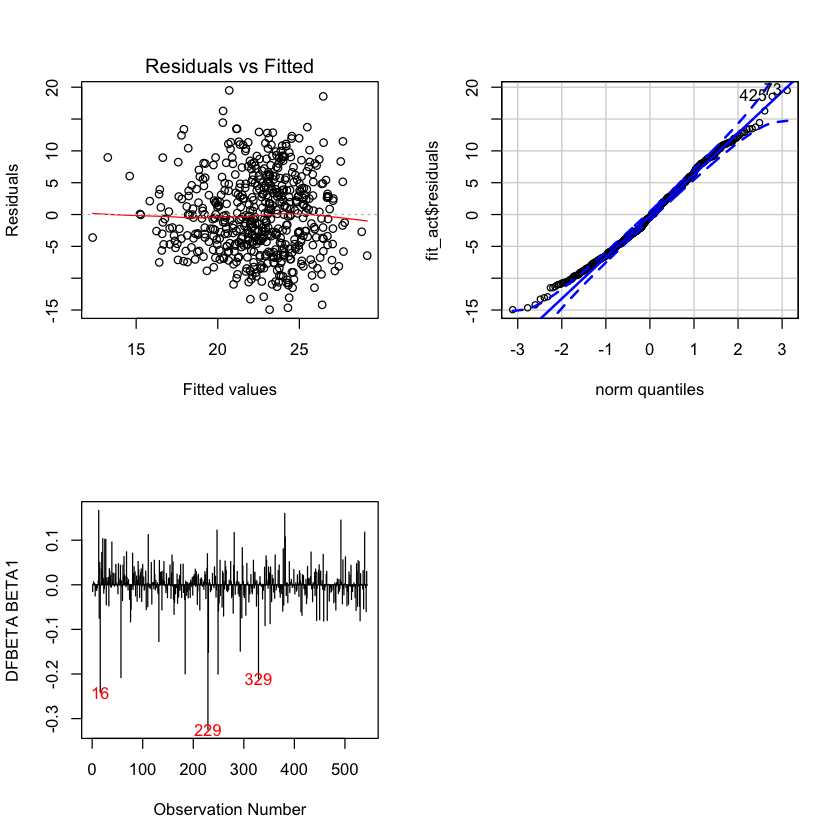

In [22]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_act, 1, id.n = 0)
# normality check
library(car)
qqPlot(fit_act$residuals)

# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_act)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [23]:
fit_act_out = lm(alpha_pd[-show.points] ~ ratio_activation[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])
summary(fit_act_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ ratio_activation[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + PASCORE[-show.points] + M1ADEPR[-show.points] + 
    M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9668  -4.6159  -0.4111   4.1121  19.3809 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             25.794399   2.389301  10.796  < 2e-16
ratio_activation[-show.points]           1.179363   0.301382   3.913 0.000103
Age_78[-show.points]                     0.157514   0.070611   2.231 0.026123
BMI[-show.points]                       -0.124946   0.074347  -1.681 0.093445
GIERACE[-show.points]2:AFRICAN AMERICAN -2.111153   1.605320  -1.315 0.189054
GIERACE[-show.points]3:ASIAN            -6.448074   1.446161  -4.459 1.01e-05
GIERACE[-show.points]4:HISPANI

## Catabolism

In [24]:
fit_cat = lm(alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + SITE + PASCORE + M1ADEPR +  M1ANTIB + OHSEAS + Rstarch_total)
summary(fit_cat)


Call:
lm(formula = alpha_pd ~ ratio_catabolism + Age_78 + BMI + GIERACE + 
    SITE + PASCORE + M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5592  -4.7199  -0.5548   4.1655  19.7374 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               24.961740   2.416103  10.331  < 2e-16 ***
ratio_catabolism           0.850884   0.286942   2.965  0.00316 ** 
Age_78                     0.169245   0.071476   2.368  0.01825 *  
BMI                       -0.105122   0.075317  -1.396  0.16339    
GIERACE2:AFRICAN AMERICAN -0.187494   1.523334  -0.123  0.90209    
GIERACE3:ASIAN            -6.198356   1.455368  -4.259 2.43e-05 ***
GIERACE4:HISPANIC         -0.194318   1.937064  -0.100  0.92013    
GIERACE5:OTHER            -2.194242   2.169947  -1.011  0.31239    
SITEBirmingham            -0.485772   1.008736  -0.482  0.63032    
SITEMinneapolis            1.419559   0.929320   1.528  0.12

425  73 
382  62

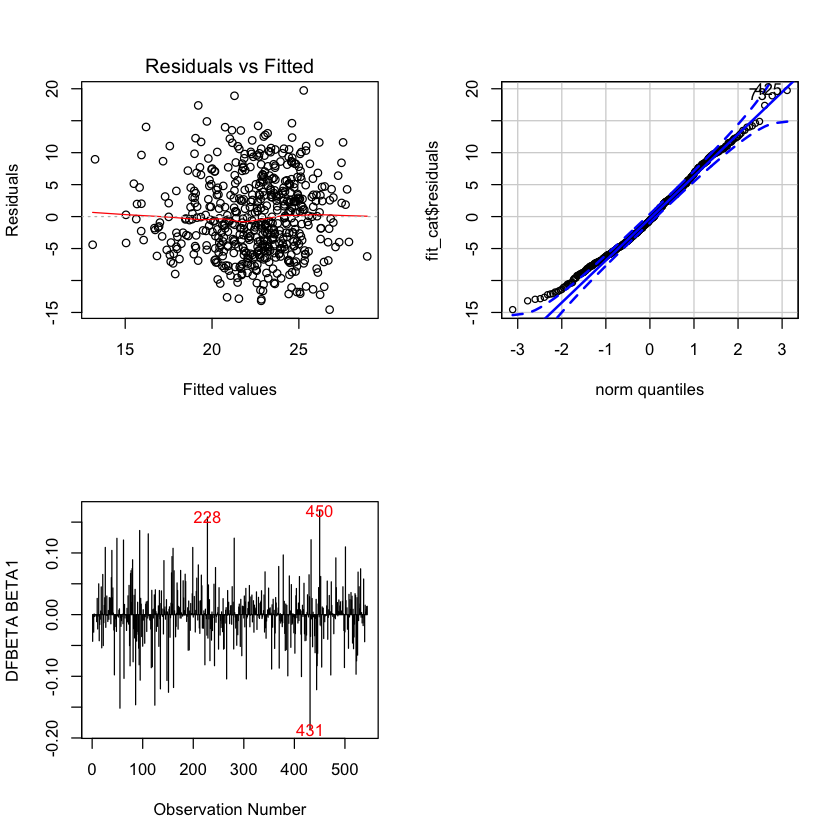

In [25]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_cat, 1, id.n = 0)
# normality check
qqPlot(fit_cat$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_cat)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [26]:
fit_cat_out = lm(alpha_pd[-show.points] ~ ratio_catabolism[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])
summary(fit_cat_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ ratio_catabolism[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + PASCORE[-show.points] + M1ADEPR[-show.points] + 
    M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.5084  -4.7395  -0.6158   4.1459  19.7877 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             24.932919   2.430903  10.257  < 2e-16
ratio_catabolism[-show.points]           0.849144   0.287972   2.949  0.00333
Age_78[-show.points]                     0.168359   0.071835   2.344  0.01947
BMI[-show.points]                       -0.104439   0.075729  -1.379  0.16845
GIERACE[-show.points]2:AFRICAN AMERICAN -0.177062   1.527204  -0.116  0.90775
GIERACE[-show.points]3:ASIAN            -6.370712   1.486368  -4.286 2.17e-05
GIERACE[-show.points]4:HISPANI

### 25D3 ### (not significant)

In [27]:
fit_25 = lm(alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + PASCORE + M1ADEPR +  M1ANTIB + OHSEAS + Rstarch_total)
summary(fit_25)


Call:
lm(formula = alpha_pd ~ OHVD3 + Age_78 + BMI + GIERACE + SITE + 
    PASCORE + M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3426  -4.7861  -0.4511   4.6196  19.6504 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               25.712796   2.436748  10.552  < 2e-16 ***
OHVD3                      0.041927   0.285996   0.147  0.88350    
Age_78                     0.139457   0.071376   1.954  0.05125 .  
BMI                       -0.132530   0.075743  -1.750  0.08075 .  
GIERACE2:AFRICAN AMERICAN -0.549536   1.550809  -0.354  0.72322    
GIERACE3:ASIAN            -6.393600   1.470948  -4.347 1.66e-05 ***
GIERACE4:HISPANIC         -0.362487   1.961216  -0.185  0.85344    
GIERACE5:OTHER            -2.356868   2.190340  -1.076  0.28241    
SITEBirmingham            -0.608434   1.022620  -0.595  0.55212    
SITEMinneapolis            1.446540   0.944200   1.532  0.12612    
SIT

73 425 
 62 382

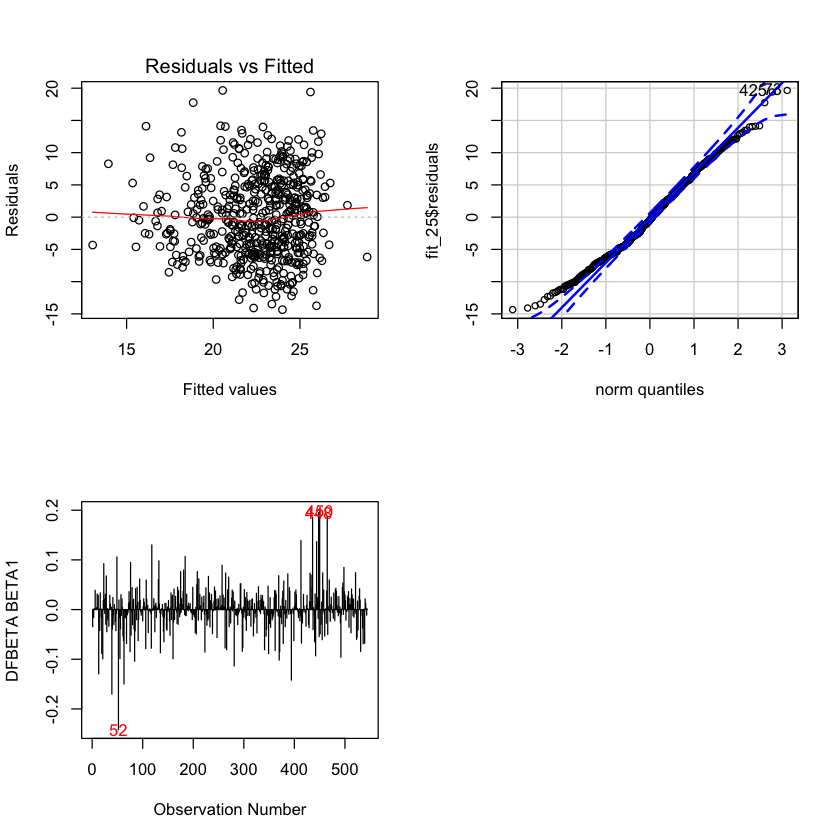

In [28]:
par(mfrow=c(2,2))
# residual s25terplot
plot(fit_25, 1, id.n = 0)
# normality check
qqPlot(fit_25$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_25)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [29]:
fit_25_out = lm(alpha_pd[-show.points] ~ OHVD3[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])
summary(fit_25_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ OHVD3[-show.points] + Age_78[-show.points] + 
    BMI[-show.points] + GIERACE[-show.points] + SITE[-show.points] + 
    PASCORE[-show.points] + M1ADEPR[-show.points] + M1ANTIB[-show.points] + 
    OHSEAS[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.3431  -4.7885  -0.4802   4.6231  19.6455 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             25.684219   2.448532  10.490  < 2e-16
OHVD3[-show.points]                      0.042251   0.286557   0.147  0.88284
Age_78[-show.points]                     0.138612   0.071664   1.934  0.05363
BMI[-show.points]                       -0.131242   0.076032  -1.726  0.08491
GIERACE[-show.points]2:AFRICAN AMERICAN -0.532191   1.554117  -0.342  0.73216
GIERACE[-show.points]3:ASIAN            -6.380227   1.473931  -4.329  1.8e-05
GIERACE[-show.points]4:HISPANIC         -

### 125D3 ###

In [30]:
fit_125 = lm(alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + PASCORE + M1ADEPR +  M1ANTIB + OHSEAS + Rstarch_total)
summary(fit_125)


Call:
lm(formula = alpha_pd ~ OHV1D3 + Age_78 + BMI + GIERACE + SITE + 
    PASCORE + M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.910  -4.348  -0.383   4.073  19.307 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               24.654357   2.361987  10.438  < 2e-16 ***
OHV1D3                     1.385469   0.276271   5.015 7.23e-07 ***
Age_78                     0.156867   0.069374   2.261  0.02415 *  
BMI                       -0.085802   0.073902  -1.161  0.24615    
GIERACE2:AFRICAN AMERICAN -0.903255   1.491938  -0.605  0.54515    
GIERACE3:ASIAN            -5.974918   1.434757  -4.164 3.64e-05 ***
GIERACE4:HISPANIC         -0.220377   1.907323  -0.116  0.90806    
GIERACE5:OTHER            -2.375696   2.134617  -1.113  0.26623    
SITEBirmingham             0.008865   0.945012   0.009  0.99252    
SITEMinneapolis            1.511958   0.915702   1.651  0.09930 .  
SITEPalo Alt

73 425 
 73 393

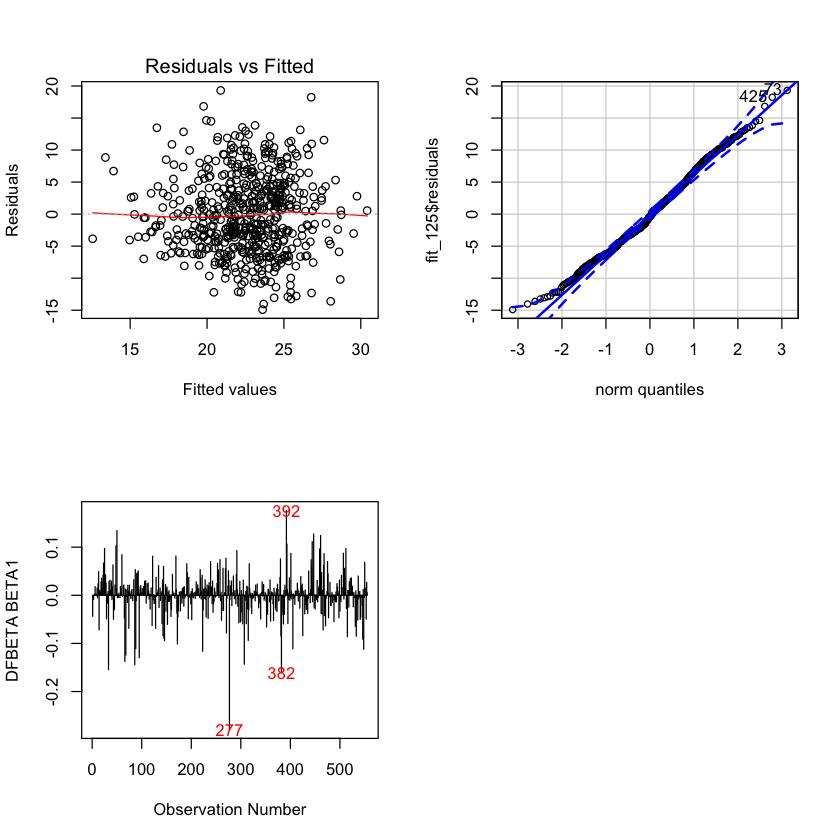

In [31]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_125, 1, id.n = 0)
# normality check
qqPlot(fit_125$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_125)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [32]:
fit_125_out = lm(alpha_pd[-show.points] ~ OHV1D3[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])
summary(fit_125_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ OHV1D3[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + PASCORE[-show.points] + M1ADEPR[-show.points] + 
    M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8835  -4.3801  -0.3686   4.1459  19.3303 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             24.745924   2.368348  10.449  < 2e-16
OHV1D3[-show.points]                     1.394526   0.277140   5.032 6.66e-07
Age_78[-show.points]                     0.155557   0.069514   2.238  0.02565
BMI[-show.points]                       -0.090070   0.074205  -1.214  0.22536
GIERACE[-show.points]2:AFRICAN AMERICAN -0.755665   1.533769  -0.493  0.62244
GIERACE[-show.points]3:ASIAN            -5.965155   1.437389  -4.150 3.87e-05
GIERACE[-show.points]4:HISPANIC         

### 24D3 ###

In [33]:
fit_24 = lm(alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + PASCORE + M1ADEPR +  M1ANTIB + OHSEAS + Rstarch_total)
summary(fit_24)


Call:
lm(formula = alpha_pd ~ OHV24D3 + Age_78 + BMI + GIERACE + SITE + 
    PASCORE + M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7119  -4.7321  -0.5544   4.3334  19.6283 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               25.131789   2.416375  10.401  < 2e-16 ***
OHV24D3                    0.642717   0.284840   2.256  0.02445 *  
Age_78                     0.146765   0.070785   2.073  0.03861 *  
BMI                       -0.110160   0.075462  -1.460  0.14493    
GIERACE2:AFRICAN AMERICAN -0.248471   1.530218  -0.162  0.87107    
GIERACE3:ASIAN            -6.135646   1.464147  -4.191 3.25e-05 ***
GIERACE4:HISPANIC         -0.046720   1.948548  -0.024  0.98088    
GIERACE5:OTHER            -2.195920   2.177138  -1.009  0.31361    
SITEBirmingham            -0.179122   0.963448  -0.186  0.85258    
SITEMinneapolis            1.605269   0.935664   1.716  0.08681 .  
S

425  73 
393  73

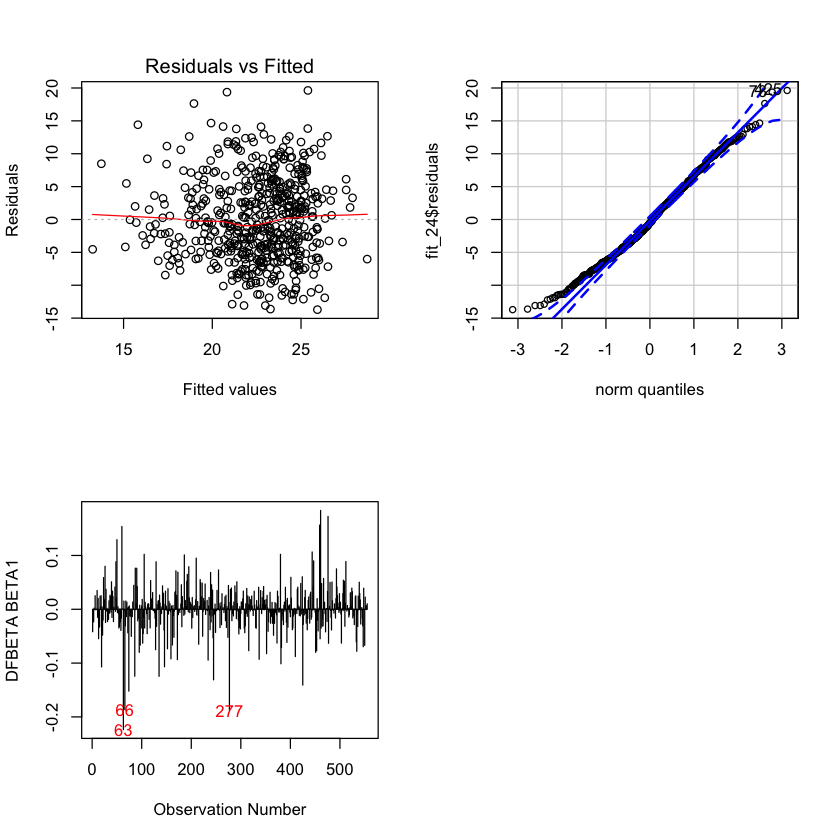

In [34]:
par(mfrow=c(2,2))
# residual scatterplot
plot(fit_24, 1, id.n = 0)
# normality check
qqPlot(fit_24$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_24)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [35]:
fit_24_out = lm(alpha_pd[-show.points] ~ OHV24D3[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])
summary(fit_24_out) # little change


Call:
lm(formula = alpha_pd[-show.points] ~ OHV24D3[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + PASCORE[-show.points] + M1ADEPR[-show.points] + 
    M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7315  -4.6796  -0.5786   4.2469  19.5672 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             25.363250   2.413441  10.509  < 2e-16
OHV24D3[-show.points]                    0.763300   0.289430   2.637  0.00860
Age_78[-show.points]                     0.158810   0.071042   2.235  0.02580
BMI[-show.points]                       -0.119255   0.075358  -1.583  0.11413
GIERACE[-show.points]2:AFRICAN AMERICAN -0.244593   1.526415  -0.160  0.87275
GIERACE[-show.points]3:ASIAN            -6.067242   1.460587  -4.154 3.81e-05
GIERACE[-show.points]4:HISPANIC        

### Vitamin D status (not significant) ### 

In [36]:
fit_vd = lm(alpha_pd ~ VDstatus + Age_78 + BMI + GIERACE + SITE + PASCORE + M1ADEPR +  M1ANTIB + OHSEAS + Rstarch_total)
summary(fit_vd)


Call:
lm(formula = alpha_pd ~ VDstatus + Age_78 + BMI + GIERACE + SITE + 
    PASCORE + M1ADEPR + M1ANTIB + OHSEAS + Rstarch_total)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4697  -4.8367  -0.5321   4.6298  19.4737 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    25.607049   2.360026  10.850  < 2e-16 ***
VDstatusdeficiency             -0.798714   1.113190  -0.718  0.47336    
VDstatusMissing:Not collected   1.618733   2.141986   0.756  0.45014    
Age_78                          0.124834   0.069601   1.794  0.07342 .  
BMI                            -0.130527   0.073572  -1.774  0.07658 .  
GIERACE2:AFRICAN AMERICAN      -0.737096   1.425229  -0.517  0.60524    
GIERACE3:ASIAN                 -5.884369   1.326056  -4.437  1.1e-05 ***
GIERACE4:HISPANIC              -0.284995   1.957118  -0.146  0.88427    
GIERACE5:OTHER                 -2.430854   2.192445  -1.109  0.26802    
SITEBirmingham    

425  73 
413  73

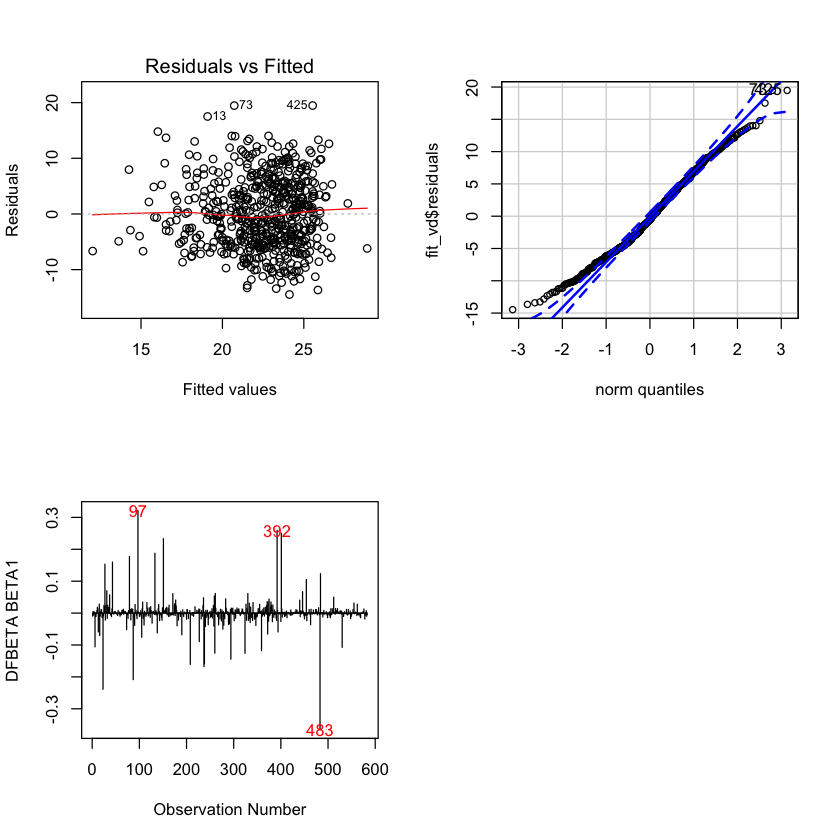

In [37]:
par(mfrow=c(2,2))
plot(fit_vd, 1)
qqPlot(fit_vd$residuals)
# DFBETAs
n = nrow(data)
dfbetas.vd = dfbetas(fit_vd)
plot(dfbetas.vd[,2], type='h', xlab='Observation Number', ylab='DFBETA BETA1')
show.points = order(-abs(dfbetas.vd[,2]))[1:3]
text(seq(1,n)[show.points], dfbetas.vd[show.points,2], show.points, col='red')

In [38]:
fit_vd_out = lm(alpha_pd[-show.points] ~ VDstatus[-show.points] + Age_78[-show.points] + BMI[-show.points] +
                GIERACE[-show.points] + SITE[-show.points] + PASCORE[-show.points] + 
                M1ADEPR[-show.points] + M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])
summary(fit_vd_out)


Call:
lm(formula = alpha_pd[-show.points] ~ VDstatus[-show.points] + 
    Age_78[-show.points] + BMI[-show.points] + GIERACE[-show.points] + 
    SITE[-show.points] + PASCORE[-show.points] + M1ADEPR[-show.points] + 
    M1ANTIB[-show.points] + OHSEAS[-show.points] + Rstarch_total[-show.points])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2880  -4.8534  -0.4897   4.5745  19.5402 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  25.558944   2.374352  10.765
VDstatus[-show.points]deficiency             -0.807808   1.115811  -0.724
VDstatus[-show.points]Missing:Not collected   1.611794   2.143969   0.752
Age_78[-show.points]                          0.124065   0.069656   1.781
BMI[-show.points]                            -0.126086   0.073890  -1.706
GIERACE[-show.points]2:AFRICAN AMERICAN      -0.593767   1.459134  -0.407
GIERACE[-show.points]3:ASIAN                 -5.902427   1.327281 

### Visualization ###

In [39]:
pdf('../figures/MLR_act.pdf', width=5, height=5)
ratio_act.sort = sort(data$ratio_activation)
plot(ratio_activation, alpha_pd, col='red', xlab='Activation Ratio', ylab='PD Alpha Diversity', 
     cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_act = predict(fit_act, newdata=data.frame(ratio_activation=ratio_act.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(ratio_act.sort, pred_act$fit, col='red', lwd=4)
lines(ratio_act.sort, pred_act$fit - 1.96*pred_act$se.fit, col='red', lty=2, lwd=3)
lines(ratio_act.sort, pred_act$fit + 1.96*pred_act$se.fit, col='red', lty=2, lwd=3)
dev.off()

pdf 
  2

In [40]:
pdf('../figures/MLR_cat.pdf', width=5, height=5)
ratio_cat.sort = sort(data$ratio_catabolism)
plot(ratio_catabolism, alpha_pd, col='purple', xlab='Catabolism Ratio', ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_cat = predict(fit_cat, newdata=data.frame(ratio_catabolism=ratio_cat.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(ratio_cat.sort, pred_cat$fit, col='purple', lwd=4)
lines(ratio_cat.sort, pred_cat$fit - 1.96*pred_cat$se.fit, col='purple', lty=2, lwd=3)
lines(ratio_cat.sort, pred_cat$fit + 1.96*pred_cat$se.fit, col='purple', lty=2, lwd=3)
dev.off()

pdf 
  2

In [45]:
pdf('../figures/MLR_125.pdf', width=5, height=5)
V1D3.sort = sort(data$OHV1D3)
plot(OHV1D3, alpha_pd, col='darkgreen', xlab=expression(bold('1,25(OH)'[2]*'D')), ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_125 = predict(fit_125, newdata=data.frame(OHV1D3=V1D3.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(V1D3.sort, pred_125$fit, col='green', lwd=4)
lines(V1D3.sort, pred_125$fit - 1.96*pred_125$se.fit, col='green', lty=2, lwd=3)
lines(V1D3.sort, pred_125$fit + 1.96*pred_125$se.fit, col='green', lty=2, lwd=3)
dev.off()

pdf 
  2

In [44]:
pdf('../figures/MLR_24.pdf', width=5, height=5)
V24D3.sort = sort(data$OHV24D3)
plot(OHV24D3, alpha_pd, col='darkorange', xlab=expression(bold('24,25(OH)'[2]*'D')), ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_24 = predict(fit_24, newdata=data.frame(OHV24D3=V24D3.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(V24D3.sort, pred_24$fit, col='orange', lwd=4)
lines(V24D3.sort, pred_24$fit - 1.96*pred_24$se.fit, col='orange', lty=2, lwd=3)
lines(V24D3.sort, pred_24$fit + 1.96*pred_24$se.fit, col='orange', lty=2, lwd=3)
dev.off()

pdf 
  2

In [43]:
pdf('../figures/MLR_25.pdf', width=5, height=5)
V25D3.sort = sort(data$OHVD3)
plot(OHVD3, alpha_pd, col='darkblue', xlab='25(OH)D', ylab='PD Alpha Diversity',
    cex.lab=1.5, cex.axis=1.2, font.lab=2, font.axis=2)
pred_25 = predict(fit_25, newdata=data.frame(OHVD3=V25D3.sort, Age_78=mean(data$Age_78), BMI=mean(data$BMI),
                                          GIERACE='1:WHITE', SITE='San Diego', TUDRAMT = '0:None drinker',
                                          PASCORE = mean(data$PASCORE), M1ADEPR='0: No', M1ANTIB='0: No', 
                                          OHSEAS='3:SUMMER', M1STATIN='1: Yes',
                                          Rstarch_total=mean(data$Rstarch_total, na.rm=T)), type='response', se.fit=T)
lines(V25D3.sort, pred_25$fit, col='blue', lwd=4)
lines(V25D3.sort, pred_25$fit - 1.96*pred_25$se.fit, col='blue', lty=2, lwd=3)
lines(V25D3.sort, pred_25$fit + 1.96*pred_25$se.fit, col='blue', lty=2, lwd=3)
dev.off()

pdf 
  2